Initialize a repository if there isn't one already

In [1]:
!git init

Reinitialized existing Git repository in /home/nathan/HCL/github/World Vaccination/trunk/source/DataCleaning/.git/


Code to pull new data from the github

In [2]:
!git pull https://github.com/owid/covid-19-data.git

remote: Enumerating objects: 2217, done.
remote: Counting objects: 100% (1833/1833), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 2217 (delta 1679), reused 1774 (delta 1628), pack-reused 384
Receiving objects: 100% (2217/2217), 487.11 MiB | 10.64 MiB/s, done.
Resolving deltas: 100% (1783/1783), completed with 296 local objects.
From https://github.com/owid/covid-19-data
 * branch                HEAD       -> FETCH_HEAD
Updating d5fd3f2f6..79d28ae10
Updating files: 100% (535/535), done.
Fast-forward
 public/data/README.md                              |     4 +-
 public/data/internal/megafile--auxiliary.json      |     2 +-
 public/data/internal/megafile--cases-tests.json    |     2 +-
 public/data/internal/megafile--deaths.json         |     2 +-
 .../internal/megafile--hospital-admissions.json    |     2 +-
 public/data/internal/megafile--vaccinations.json   |     2 +-
 ...owid-covid-data-last-updated-timestamp-hosp.txt |     2 +-
 ...owid-covid-data-last-upda

Bring back deleted public directory (if the files have been deleted)

In [3]:
!git restore public

Move the data we are going to use into our resources folder for data cleaning

In [4]:
!cp ./public/data/vaccinations/vaccinations.csv ../../resource/DataCleaning

Code that will remove all files downloaded off of git, can be commented out in order to speed up consecutive run times.

In [5]:
!rm -rf public
!rm -rf scripts
!rm -f README.md

Setup: Import necessarily libraries and read the csv our data is in.

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("../../resource/DataCleaning/vaccinations.csv")

Show what the data looks like in chart form:

In [7]:
data

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31411,Zimbabwe,ZWE,2021-06-30,1332438.0,777161.0,555277.0,16841.0,23656.0,8.96,5.23,3.74,1592.0
31412,Zimbabwe,ZWE,2021-07-01,1341960.0,782698.0,559262.0,9522.0,21235.0,9.03,5.27,3.76,1429.0
31413,Zimbabwe,ZWE,2021-07-02,1352718.0,788004.0,564714.0,10758.0,18686.0,9.10,5.30,3.80,1257.0
31414,Zimbabwe,ZWE,2021-07-03,1359587.0,791901.0,567686.0,6869.0,15726.0,9.15,5.33,3.82,1058.0


Since there is a corresponding scaled version and unscaled version for total vaccinations, people vaccinated, people fully vaccinated, and daily vaccinations, I am going to drop these columns.

In [8]:
data.drop(["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations","daily_vaccinations_raw"],axis=1,inplace=True)
data

,location,iso_code,date,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.00,0.00,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,35.0
...,...,...,...,...,...,...,...
31411,Zimbabwe,ZWE,2021-06-30,8.96,5.23,3.74,1592.0
31412,Zimbabwe,ZWE,2021-07-01,9.03,5.27,3.76,1429.0
31413,Zimbabwe,ZWE,2021-07-02,9.10,5.30,3.80,1257.0
31414,Zimbabwe,ZWE,2021-07-03,9.15,5.33,3.82,1058.0


Next two things I notice are that the dates are not in a form that we can use, so I want to convert into number of days since first recorded date and that there is both an iso code and country column, I will delete the iso code because country is much more human readable for charts and later with taking in input for our model.

In [9]:
data.drop(["iso_code"],axis=1,inplace=True) # Remove iso code column

In [10]:
data.date = pd.to_datetime(data.date,format="%Y-%m-%d") # Convert date strings to datetime objects
data

,location,date,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,2021-02-22,0.00,0.00,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,35.0
2,Afghanistan,2021-02-24,NaN,NaN,NaN,35.0
3,Afghanistan,2021-02-25,NaN,NaN,NaN,35.0
4,Afghanistan,2021-02-26,NaN,NaN,NaN,35.0
...,...,...,...,...,...,...
31411,Zimbabwe,2021-06-30,8.96,5.23,3.74,1592.0
31412,Zimbabwe,2021-07-01,9.03,5.27,3.76,1429.0
31413,Zimbabwe,2021-07-02,9.10,5.30,3.80,1257.0
31414,Zimbabwe,2021-07-03,9.15,5.33,3.82,1058.0


Next, I want to make sure that there is no typos in the country column

In [11]:
data.rename(columns={"location":"country"},inplace=True)
data.country.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe',
 

Next, I want to check how much missing data there is and see what columns are missing data.

In [12]:
print("Missing data overall:",data.isnull().sum().sum()) # Find the total number of missing entries
print("Missing data breakdown:")
print(data.isnull().sum()) # Print the breakdown of missing data

Missing data overall: 43601
Missing data breakdown:
country                                    0
date                                       0
total_vaccinations_per_hundred         12883
people_vaccinated_per_hundred          13742
people_fully_vaccinated_per_hundred    16723
daily_vaccinations_per_million           253
dtype: int64


Since our dependent variable is people_fully_vaccinated_per_hundred, it doesn't make much sense to keep any row where this value is empty. Thus, we will drop all of these rows

In [13]:
data.drop(data.loc[data.people_fully_vaccinated_per_hundred.isnull()].index,axis=0,inplace=True)
data

,country,date,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
78,Afghanistan,2021-05-11,1.30,1.15,0.14,358.0
87,Afghanistan,2021-05-20,1.41,1.21,0.20,124.0
91,Afghanistan,2021-05-24,1.47,1.22,0.25,146.0
93,Afghanistan,2021-05-26,1.52,1.23,0.29,174.0
94,Afghanistan,2021-05-27,1.52,1.23,0.29,167.0
...,...,...,...,...,...,...
31411,Zimbabwe,2021-06-30,8.96,5.23,3.74,1592.0
31412,Zimbabwe,2021-07-01,9.03,5.27,3.76,1429.0
31413,Zimbabwe,2021-07-02,9.10,5.30,3.80,1257.0
31414,Zimbabwe,2021-07-03,9.15,5.33,3.82,1058.0


In [14]:
print("Missing data overall:",data.isnull().sum().sum()) # Find the total number of missing entries
print("Missing data breakdown:")
print(data.isnull().sum()) # Print the breakdown of missing data

Missing data overall: 68
Missing data breakdown:
country                                 0
date                                    0
total_vaccinations_per_hundred         26
people_vaccinated_per_hundred          19
people_fully_vaccinated_per_hundred     0
daily_vaccinations_per_million         23
dtype: int64


For now this looks good, the only missing data is total_vaccinations_per_hundred, people_vaccinated_per_hundred, and daily_vaccinations_per_million column and there is not a lot of missing data, less than 1%. Also, for the first model, we are not using these features.

Now I want to check out which countries have enough data to make a good model off of

In [15]:
print(data.groupby("country").date.count().sort_values().head(60))
print(data.groupby("country").date.count().sort_values().tail(60))

country
Papua New Guinea                    1
Bonaire Sint Eustatius and Saba     1
China                               1
Turkmenistan                        1
Syria                               1
Nauru                               1
Samoa                               2
Rwanda                              2
Lesotho                             2
Kosovo                              2
Falkland Islands                    2
Guinea-Bissau                       2
Armenia                             2
Djibouti                            3
Eswatini                            3
Saint Helena                        3
Iraq                                3
Gambia                              3
Benin                               3
Ghana                               3
Togo                                3
Uganda                              3
Venezuela                           3
United Arab Emirates                4
Cook Islands                        4
Kyrgyzstan                          4
Maur

I'm going to choose a cuttoff of at least 100 data points to count as "enough data", but this cuttoff is ultimately subjective

In [16]:
countries_to_drop = [c for c in data.country.unique() if (data.groupby("country").date.count() < 100)[c]] # Create a list of countries that have less than 100 data points
print(len(countries_to_drop)) # Print the number of countries that we are dropping
data.drop(data.loc[data.country.isin(countries_to_drop)].index,inplace=True) # Drop data points for countries with less than 100 data points
data

142


,country,date,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
159,Africa,2021-02-03,0.03,0.00,0.00,34.0
160,Africa,2021-02-04,0.03,0.00,0.00,39.0
161,Africa,2021-02-05,0.03,0.00,0.00,44.0
162,Africa,2021-02-06,0.04,0.00,0.00,41.0
164,Africa,2021-02-08,0.04,0.00,0.00,38.0
...,...,...,...,...,...,...
31411,Zimbabwe,2021-06-30,8.96,5.23,3.74,1592.0
31412,Zimbabwe,2021-07-01,9.03,5.27,3.76,1429.0
31413,Zimbabwe,2021-07-02,9.10,5.30,3.80,1257.0
31414,Zimbabwe,2021-07-03,9.15,5.33,3.82,1058.0


I'm going to plot this data to just visually see what kind of model I might use

<AxesSubplot:xlabel='date', ylabel='people_fully_vaccinated_per_hundred'>

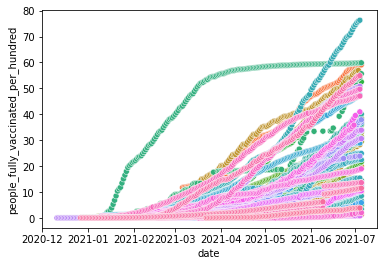

In [17]:
sns.scatterplot(x=data.date,y=data.people_fully_vaccinated_per_hundred,hue=data.country, legend=False)

There is a lot of data points here, where it would probably be better to extract just a few countries.

<AxesSubplot:xlabel='date', ylabel='people_fully_vaccinated_per_hundred'>

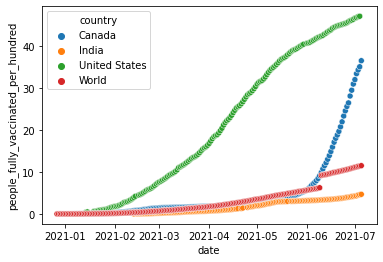

In [18]:
smaller_data = data.loc[data.country.isin(["United States","India","Canada","World"])] # Extract data from 3 countries
sns.scatterplot(x=smaller_data.date,y=smaller_data.people_fully_vaccinated_per_hundred,hue=smaller_data.country)

Create a plot for each country

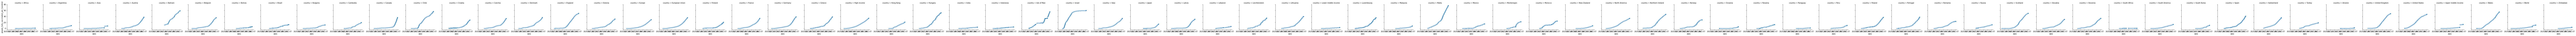

In [19]:
graph = sns.FacetGrid(data,col="country")
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred")

I notice that every function is for sure not linear. Thus, we are going to need to use things like logistic, polynomial, or exponential regressions. For my first model that only takes in the date as a dependent variable and makes a model for every country.

In [20]:
data1 = data.copy() # Save this data for later use when we get to modeling.
data1.drop(["total_vaccinations_per_hundred","people_vaccinated_per_hundred","daily_vaccinations_per_million"],axis=1,inplace=True)
data1

,country,date,people_fully_vaccinated_per_hundred
159,Africa,2021-02-03,0.00
160,Africa,2021-02-04,0.00
161,Africa,2021-02-05,0.00
162,Africa,2021-02-06,0.00
164,Africa,2021-02-08,0.00
...,...,...,...
31411,Zimbabwe,2021-06-30,3.74
31412,Zimbabwe,2021-07-01,3.76
31413,Zimbabwe,2021-07-02,3.80
31414,Zimbabwe,2021-07-03,3.82


Next I will work on a model that takes in data and predicts the percent vaccinated m months from now. I am going to choose m=2 for a start. Later I can create a function that takes in m.

In [21]:
m = 2 # Set m to be used later

In [22]:
data2 = data[["country","date","people_fully_vaccinated_per_hundred"]]
data2.date = data2.date - datetime.timedelta(weeks=m*4)
data2

,country,date,people_fully_vaccinated_per_hundred
159,Africa,2020-12-09,0.00
160,Africa,2020-12-10,0.00
161,Africa,2020-12-11,0.00
162,Africa,2020-12-12,0.00
164,Africa,2020-12-14,0.00
...,...,...,...
31411,Zimbabwe,2021-05-05,3.74
31412,Zimbabwe,2021-05-06,3.76
31413,Zimbabwe,2021-05-07,3.80
31414,Zimbabwe,2021-05-08,3.82


In [23]:
left = data.set_index(["country","date"]) # Set data indices to country and date
right = data2.set_index(["country","date"]) # Set indices of data 2 weeks later to country and date
newdata = left.join(right, lsuffix="", rsuffix="_2") # Join the normal data and data 2 weeks later by the country and date fields
newdata.reset_index(inplace=True) # Reset the indices of this new data
newdata

,country,date,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2
0,Africa,2021-02-03,0.03,0.00,0.00,34.0,0.30
1,Africa,2021-02-04,0.03,0.00,0.00,39.0,0.31
2,Africa,2021-02-05,0.03,0.00,0.00,44.0,0.31
3,Africa,2021-02-06,0.04,0.00,0.00,41.0,0.32
4,Africa,2021-02-08,0.04,0.00,0.00,38.0,0.32
...,...,...,...,...,...,...,...
10664,Zimbabwe,2021-06-30,8.96,5.23,3.74,1592.0,NaN
10665,Zimbabwe,2021-07-01,9.03,5.27,3.76,1429.0,NaN
10666,Zimbabwe,2021-07-02,9.10,5.30,3.80,1257.0,NaN
10667,Zimbabwe,2021-07-03,9.15,5.33,3.82,1058.0,NaN


In [24]:
print(data.shape[0]) # Print the original number of data points
print(newdata.shape[0]) # Print the new number of data points
print(newdata.isnull().sum()) # Show a breakdown of where there is missing data

10669
10669
country                                     0
date                                        0
total_vaccinations_per_hundred             25
people_vaccinated_per_hundred              11
people_fully_vaccinated_per_hundred         0
daily_vaccinations_per_million             10
people_fully_vaccinated_per_hundred_2    4011
dtype: int64


Now I notice that about more than 1/3 of our data doesn't have a corresponding 2 months later. My next thought is that we can use data that is 2 or more months prior, but the question is how do I scale it properly so that I could do something like divide the value by the number of days away it is, but as we saw earlier, the growth is not linear so it doesn't seem like a very good option. 

Instead, let's focus on try to tweek this value of number of days away in order to come to an optimal value. We will make the minimum days since be at least 2 weeks. Since less than that doesn't seem that significant for practical use.

In [25]:
goodm = [] # Create a list to hold the best length and the number of missing values
for gm in range(14,100): # Loop through different time differences, from 2 weeks up to 100 days.
    data2 = data[["country","date","people_fully_vaccinated_per_hundred"]] # Extract just the country, date, and people fully vaccinated per hundred
    data2.date = data2.date - datetime.timedelta(days = gm) # Subtract the original date by the number of days from the loop
    right = data2.set_index(["country","date"]) # Set the indices of this m days later dataset to country and date
    newdata = left.join(right, lsuffix="", rsuffix="_2") # Join together the original data set with the new m days later data
    if len(goodm) == 0: # If this is the first iteration, set the best length and number of missing values
        goodm = [gm, newdata.isnull().people_fully_vaccinated_per_hundred_2.sum()]
    else: # Otherwise, check if the number of missing values is less, and if so, set the new length and missing values
        missing_val = newdata.isnull().people_fully_vaccinated_per_hundred_2.sum()
        if goodm[1] > missing_val:
            goodm = [gm, missing_val]
print(goodm)

[14, 1245]


This value is better a lot better where we are losing about 12% of our data.

Let's see how this would possibly affect the data.

In [26]:
data2 = data[["country","date","people_fully_vaccinated_per_hundred"]] # Extract the country, date, and people fully vaccinated sections
data2.date = data2.date - datetime.timedelta(days = goodm[0]) # Subtract the date by the best number of days found above
right = data2.set_index(["country","date"]) # Set this new m days later data to have indices of country and date
newdata = left.join(right, lsuffix="", rsuffix="_2") # Join the two data sets together
newdata.reset_index(inplace=True) # Reset the indices
newdata.drop(newdata.loc[newdata.people_fully_vaccinated_per_hundred_2.isnull()].index,axis=0,inplace=True) # Drop any rows that have a null value in the new calculated field
newdata

,country,date,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2
0,Africa,2021-02-03,0.03,0.00,0.00,34.0,0.00
1,Africa,2021-02-04,0.03,0.00,0.00,39.0,0.00
2,Africa,2021-02-05,0.03,0.00,0.00,44.0,0.00
3,Africa,2021-02-06,0.04,0.00,0.00,41.0,0.00
4,Africa,2021-02-08,0.04,0.00,0.00,38.0,0.01
...,...,...,...,...,...,...,...
10650,Zimbabwe,2021-06-16,7.54,4.69,2.85,355.0,3.74
10651,Zimbabwe,2021-06-17,7.58,4.70,2.87,352.0,3.76
10652,Zimbabwe,2021-06-18,7.61,4.71,2.90,332.0,3.80
10653,Zimbabwe,2021-06-19,7.63,4.72,2.91,293.0,3.82


Let's compare how much data per country there is before and after this conversion

In [27]:
print(data.groupby("country").date.count().sort_values())
print(newdata.groupby("country").date.count().sort_values())

country
Montenegro        100
Ukraine           101
Bolivia           102
Lebanon           103
Croatia           104
                 ... 
High income       191
World             191
Europe            191
European Union    191
Scotland          205
Name: date, Length: 71, dtype: int64
country
Isle of Man        66
Croatia            77
South Africa       77
Lebanon            78
Panama             79
                 ... 
European Union    177
Europe            177
High income       177
World             177
Scotland          190
Name: date, Length: 71, dtype: int64


I notice that countries with more data are not affected by this change nearly as much. Rather, countries with fewer data points are being affected much more severly which makes sense. Thus, this should still work, and we could choose to use even less countries to create these models for, making a new cuttoff where we need 100 data points after converting.

In [28]:
countries_to_drop = [c for c in newdata.country.unique() if (newdata.groupby("country").date.count() < 100)[c]] # Create a list of countries where the dataset has less than 100 data points for
print(len(countries_to_drop)) # Print the number of countries we will drop
newdata.drop(newdata.loc[newdata.country.isin(countries_to_drop)].index,inplace=True) # Drop the countries without 100 data points
newdata

16


,country,date,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2
0,Africa,2021-02-03,0.03,0.00,0.00,34.0,0.00
1,Africa,2021-02-04,0.03,0.00,0.00,39.0,0.00
2,Africa,2021-02-05,0.03,0.00,0.00,44.0,0.00
3,Africa,2021-02-06,0.04,0.00,0.00,41.0,0.00
4,Africa,2021-02-08,0.04,0.00,0.00,38.0,0.01
...,...,...,...,...,...,...,...
10545,World,2021-06-17,32.77,21.40,9.78,4601.0,11.11
10546,World,2021-06-18,33.32,21.56,9.87,4724.0,11.19
10547,World,2021-06-19,33.80,21.69,9.94,4859.0,11.30
10548,World,2021-06-20,34.27,21.84,10.02,4982.0,11.39


Let's check how much missing data there is overall now.

In [29]:
newdata.isnull().sum()

country                                   0
date                                      0
total_vaccinations_per_hundred           15
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred       0
daily_vaccinations_per_million            2
people_fully_vaccinated_per_hundred_2     0
dtype: int64

At this point, there is a significant amount of missing values, but not so much that imputing will really bias the data. Thus, we should impute these values.

For this, we are going to take the original data

In [30]:
origdata = pd.read_csv("../../resource/DataCleaning/vaccinations.csv") # Read CSV File
origdata.date = pd.to_datetime(origdata.date,format="%Y-%m-%d") # Convert date strings to datetime objects
origdata.rename(columns={"location":"country"},inplace=True) # Set column labeled as "location" to "country"

Create an imputation function

In [31]:
def findImpute(date, column, country):
    d = 1 # Set the inital date difference to check for as 1
    while(True): # Loop until we find a value to return
        add = origdata.loc[origdata.date == date+datetime.timedelta(days=d)].loc[origdata.country == country] # Set add to the data point for a country one day in the future
        sub = origdata.loc[origdata.date == date-datetime.timedelta(days=d)].loc[origdata.country == country] # Set sub to the data point for a country one day in the past
        addbool = len(add) != 0 and add.notnull()[column].bool() # Create a bool to check whether we found a valid data point in the future
        subbool = len(sub) != 0 and sub.notnull()[column].bool() # Create a bool to check whether we found a valid data point in the past
        if addbool or subbool: # If either is valid, we are going to return some value
            if addbool and subbool: # If both data are valid, return the average
                return(float(add[column])+float(sub[column]))/2
            if addbool: # If just the future data is valid, return the future data point
                return float(add[column])
            else: # If just the past data is valid, return the past data
                return float(sub[column])
        d += 1 # If we didn't find a valid data point, add 1 to the date difference and loop again

Use the imputation function to replace all the missing values.

In [32]:
newdata.reset_index(inplace=True,drop=True) # Reset the indices so that it goes from 0 to len-1
for col in newdata.columns: # Loop through each column
    for i in sorted(newdata.loc[newdata[col].isnull()].index, reverse=True): # Loop through each missing data point in the columns
        newdata[col].iloc[i] = findImpute(newdata.iloc[i]["date"], col, newdata.iloc[i]["country"]) # Replace the missing data to the data point found from our imputation function

In [33]:
newdata.isnull().sum()

country                                  0
date                                     0
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred      0
daily_vaccinations_per_million           0
people_fully_vaccinated_per_hundred_2    0
dtype: int64

Now that our data is clean, let's check if there is features that are closely correlated.

<AxesSubplot:>

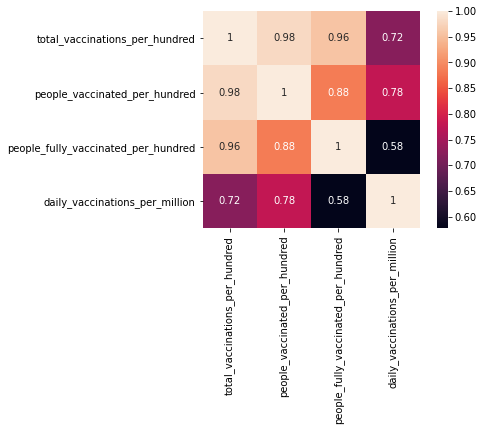

In [34]:
corr = newdata.drop("people_fully_vaccinated_per_hundred_2",axis=1).corr()
sns.heatmap(corr, square=True, annot=True)

It seems like all of our data is fairly correlated with each other, but if we are to remove the total_vaccinations_per_hundred from our data, there won't be any correlations over .9.

<AxesSubplot:>

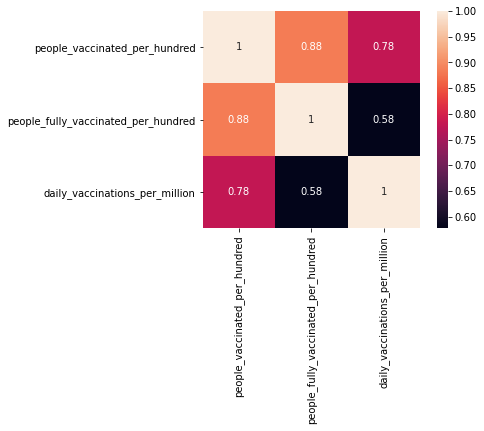

In [35]:
newdata.drop("total_vaccinations_per_hundred",axis=1,inplace=True)
corr = newdata.drop("people_fully_vaccinated_per_hundred_2",axis=1).corr()
sns.heatmap(corr, square=True, annot=True)

Now we have clean data that is ready to use in our model. I will save both of these data into new csv files.

In [36]:
data1.to_csv("../../resource/ModelCreation/worldVaccinesCleanSimple.csv",index=False)
data1.to_csv("../../resource/ModelFinalization/worldVaccineFinal.csv",index=False)
newdata.to_csv("../../resource/ModelCreation/worldVaccinesClean2WeeksLater.csv",index=False)

Now I want to try to add data from other countries as a new feature, so I am going to try to take the average of other countries on the particular day for total vaccines per 100, people vaccinated per 100, people fully vaccinated per 100, and daily vaccinations per million. To start, I am going to use a fully uncleaned version.

In [37]:
origdata = pd.read_csv("../../resource/DataCleaning/vaccinations.csv")

We will still remove the columns that we aren't going to use.

In [38]:
origdata.drop(["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations","iso_code","total_vaccinations_per_hundred"],axis=1,inplace=True)
origdata.date = pd.to_datetime(origdata.date,format="%Y-%m-%d") # Convert date strings to datetime objects
origdata

,location,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,2021-02-22,0.00,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,35.0
2,Afghanistan,2021-02-24,NaN,NaN,35.0
3,Afghanistan,2021-02-25,NaN,NaN,35.0
4,Afghanistan,2021-02-26,NaN,NaN,35.0
...,...,...,...,...,...
31411,Zimbabwe,2021-06-30,5.23,3.74,1592.0
31412,Zimbabwe,2021-07-01,5.27,3.76,1429.0
31413,Zimbabwe,2021-07-02,5.30,3.80,1257.0
31414,Zimbabwe,2021-07-03,5.33,3.82,1058.0


Looking at the unique countries, we know that there is some that aren't actual countries, but rather groups

In [39]:
origdata.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe',
 

So we need to drop the countries that aren't actually countries: World, Low income, Lower middle income, High income

In [40]:
to_drop =  ["World", "Low income", "Lower middle income", "High income"]
[origdata.drop(origdata.loc[origdata.location == c].index,inplace=True) for c in to_drop]
origdata.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe',
 

Next, we group by the date and find the mean values for each date

In [41]:
meandata = origdata.groupby("date").mean()
meandata

,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,
2020-12-02,0.000000,NaN,NaN
2020-12-03,0.000000,NaN,0.000000
2020-12-04,0.000000,NaN,0.000000
2020-12-05,0.000000,NaN,0.000000
2020-12-06,0.000000,NaN,0.000000
...,...,...,...
2021-07-01,34.731068,23.290490,4715.980769
2021-07-02,37.669640,26.473670,4805.407895
2021-07-03,34.948889,23.038778,4869.045455


Now we remove any dates that have any null values

In [42]:
meandata.isnull().sum()

people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    9
daily_vaccinations_per_million         1
dtype: int64

In [43]:
meandata.drop(meandata.loc[meandata.people_fully_vaccinated_per_hundred.isnull()].index,inplace=True)
meandata

,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,
2020-12-11,0.090000,0.000000,176.000000
2020-12-12,0.105000,0.000000,156.000000
2020-12-13,0.148571,0.000000,137.833333
2020-12-14,0.096667,0.000000,421.777778
2020-12-15,0.095556,0.000000,367.181818
...,...,...,...
2021-07-01,34.731068,23.290490,4715.980769
2021-07-02,37.669640,26.473670,4805.407895
2021-07-03,34.948889,23.038778,4869.045455


Check that there is no more empty cells

In [44]:
meandata.isnull().sum()

people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
dtype: int64

Graph the data just to see how it looks

<AxesSubplot:xlabel='date'>

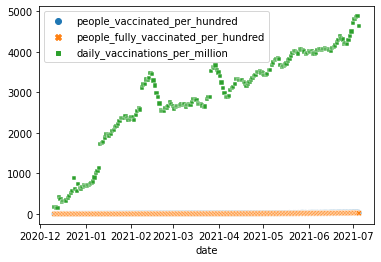

In [45]:
sns.scatterplot(data=meandata)

Graph without daily_vaccinations_per_million to look at the other features

<AxesSubplot:xlabel='date'>

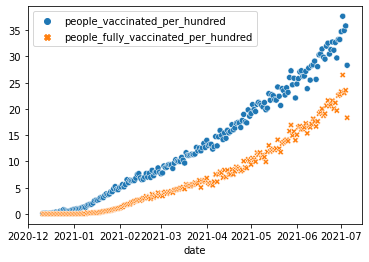

In [46]:
sns.scatterplot(data=meandata.drop("daily_vaccinations_per_million",axis=1))

Join the new mean data with the prexisting data from before

In [47]:
left = newdata.set_index(["date"])
newdata = left.join(meandata, lsuffix="", rsuffix="_ave")
newdata.reset_index(inplace=True)
newdata

,date,country,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2,people_vaccinated_per_hundred_ave,people_fully_vaccinated_per_hundred_ave,daily_vaccinations_per_million_ave
0,2020-12-11,Scotland,0.29,0.00,856.0,0.00,0.090000,0.000000,176.000000
1,2020-12-12,Scotland,0.33,0.00,739.0,0.00,0.105000,0.000000,156.000000
2,2020-12-13,Scotland,0.35,0.00,632.0,0.00,0.148571,0.000000,137.833333
3,2020-12-14,Scotland,0.45,0.00,700.0,0.00,0.096667,0.000000,421.777778
4,2020-12-15,Scotland,0.59,0.00,792.0,0.00,0.095556,0.000000,367.181818
...,...,...,...,...,...,...,...,...,...
8077,2021-06-21,Slovenia,38.59,28.87,4936.0,33.87,31.970160,20.645593,4291.727273
8078,2021-06-21,South America,26.27,11.37,5538.0,13.61,31.970160,20.645593,4291.727273
8079,2021-06-21,Turkey,34.45,17.28,14992.0,18.93,31.970160,20.645593,4291.727273
8080,2021-06-21,Upper middle income,32.43,12.78,10040.0,13.60,31.970160,20.645593,4291.727273


Check that there is no missing data

In [48]:
newdata.isnull().sum()

date                                       0
country                                    0
people_vaccinated_per_hundred              0
people_fully_vaccinated_per_hundred        0
daily_vaccinations_per_million             0
people_fully_vaccinated_per_hundred_2      0
people_vaccinated_per_hundred_ave          0
people_fully_vaccinated_per_hundred_ave    0
daily_vaccinations_per_million_ave         0
dtype: int64

Now with our new features, let's see how correlated these are to our original features.

<AxesSubplot:>

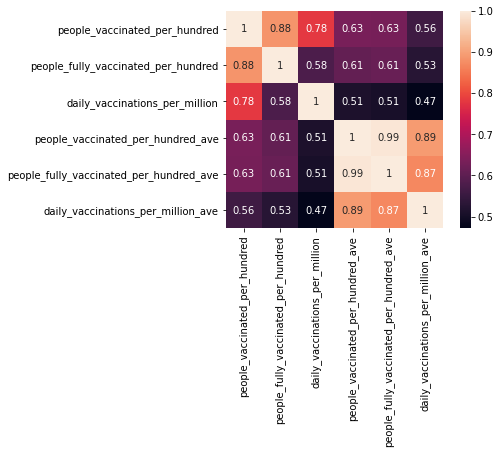

In [49]:
corr = newdata.drop("people_fully_vaccinated_per_hundred_2",axis=1).corr()
sns.heatmap(corr, square=True, annot=True)

people_vaccinated_per_hundred_ave and people_fully_vaccinated_per_hundred_ave are highly correlated, so I'm going to drop the people_vaccinated_per_hundred_ave column.

<AxesSubplot:>

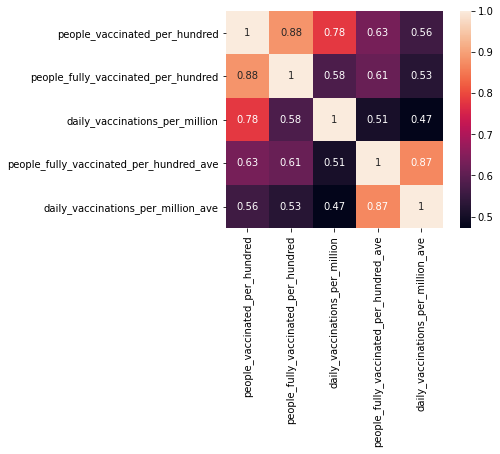

In [50]:
newdata.drop("people_vaccinated_per_hundred_ave",axis=1,inplace=True)
corr = newdata.drop("people_fully_vaccinated_per_hundred_2",axis=1).corr()
sns.heatmap(corr, square=True, annot=True)

In [51]:
newdata

,date,country,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,people_fully_vaccinated_per_hundred_2,people_fully_vaccinated_per_hundred_ave,daily_vaccinations_per_million_ave
0,2020-12-11,Scotland,0.29,0.00,856.0,0.00,0.000000,176.000000
1,2020-12-12,Scotland,0.33,0.00,739.0,0.00,0.000000,156.000000
2,2020-12-13,Scotland,0.35,0.00,632.0,0.00,0.000000,137.833333
3,2020-12-14,Scotland,0.45,0.00,700.0,0.00,0.000000,421.777778
4,2020-12-15,Scotland,0.59,0.00,792.0,0.00,0.000000,367.181818
...,...,...,...,...,...,...,...,...
8077,2021-06-21,Slovenia,38.59,28.87,4936.0,33.87,20.645593,4291.727273
8078,2021-06-21,South America,26.27,11.37,5538.0,13.61,20.645593,4291.727273
8079,2021-06-21,Turkey,34.45,17.28,14992.0,18.93,20.645593,4291.727273
8080,2021-06-21,Upper middle income,32.43,12.78,10040.0,13.60,20.645593,4291.727273


Write this new table to a csv file

In [52]:
newdata.to_csv("../../resource/ModelCreation/worldVaccinesCleanAve.csv",index=False)